In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})

# sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge


# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Reading data 

In [2]:
# link на данные
work_link = {
    'train':r"D:\Datasets\Kaggle\house-prices-advanced-regression-techniques\train.csv",
    'test': r"D:\Datasets\Kaggle\house-prices-advanced-regression-techniques\test.csv",
    'sample_submission':r"D:\Datasets\Kaggle\house-prices-advanced-regression-techniques\sample_submission.csv"
}

# reading train and test data
train_data = pd.read_csv(filepath_or_buffer=work_link['train'], index_col='Id')
test_data = pd.read_csv(filepath_or_buffer=work_link['test'], index_col='Id')

test_target =  pd.read_csv(work_link['sample_submission'], index_col='Id')
train_target = pd.DataFrame(data=train_data.SalePrice, index=train_data.index)
train_data.drop(columns='SalePrice', inplace=True)

# indexl
index_train = train_data.index
index_test = test_data.index

# data connection
alldata = pd.concat([train_data, test_data])
alltarget = pd.concat([train_target,test_target])

In [3]:
alldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Data missing

In [4]:
# Сколько NaN по каждому признаку
def function_sum_nan(df):
    """
    Функция возвращает сумму по NaN в DataFrame
    """
    isnadf = df.isna().sum()
    isnadf = (isnadf[isnadf > 0]).sort_values(ascending=False) # признаки с NaN
    return isnadf

# Заменяю NaN на NA
for index in function_sum_nan(alldata).index:
    if (alldata[index].dtype == 'object') and not ('NA' in alldata[index].unique()):
        alldata[index] = alldata[index].map(lambda x: 'NA' if x is np.NaN else x)
    else:
        alldata[index] = alldata[index].map(lambda x: 0 if str(x) == 'nan' else x)

# обновляю train and test
train_data = alldata.loc[train_data.index]
test_data = alldata.loc[test_data.index]

In [5]:
alldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml


In [6]:
# work 20.02.2021

In [7]:
numeric_type_data = [i for i in alldata.columns if alldata[i].dtype != 'object']
object_type_data = [i for i in alldata.columns if alldata[i].dtype == 'object']

In [8]:
len(numeric_type_data)

36

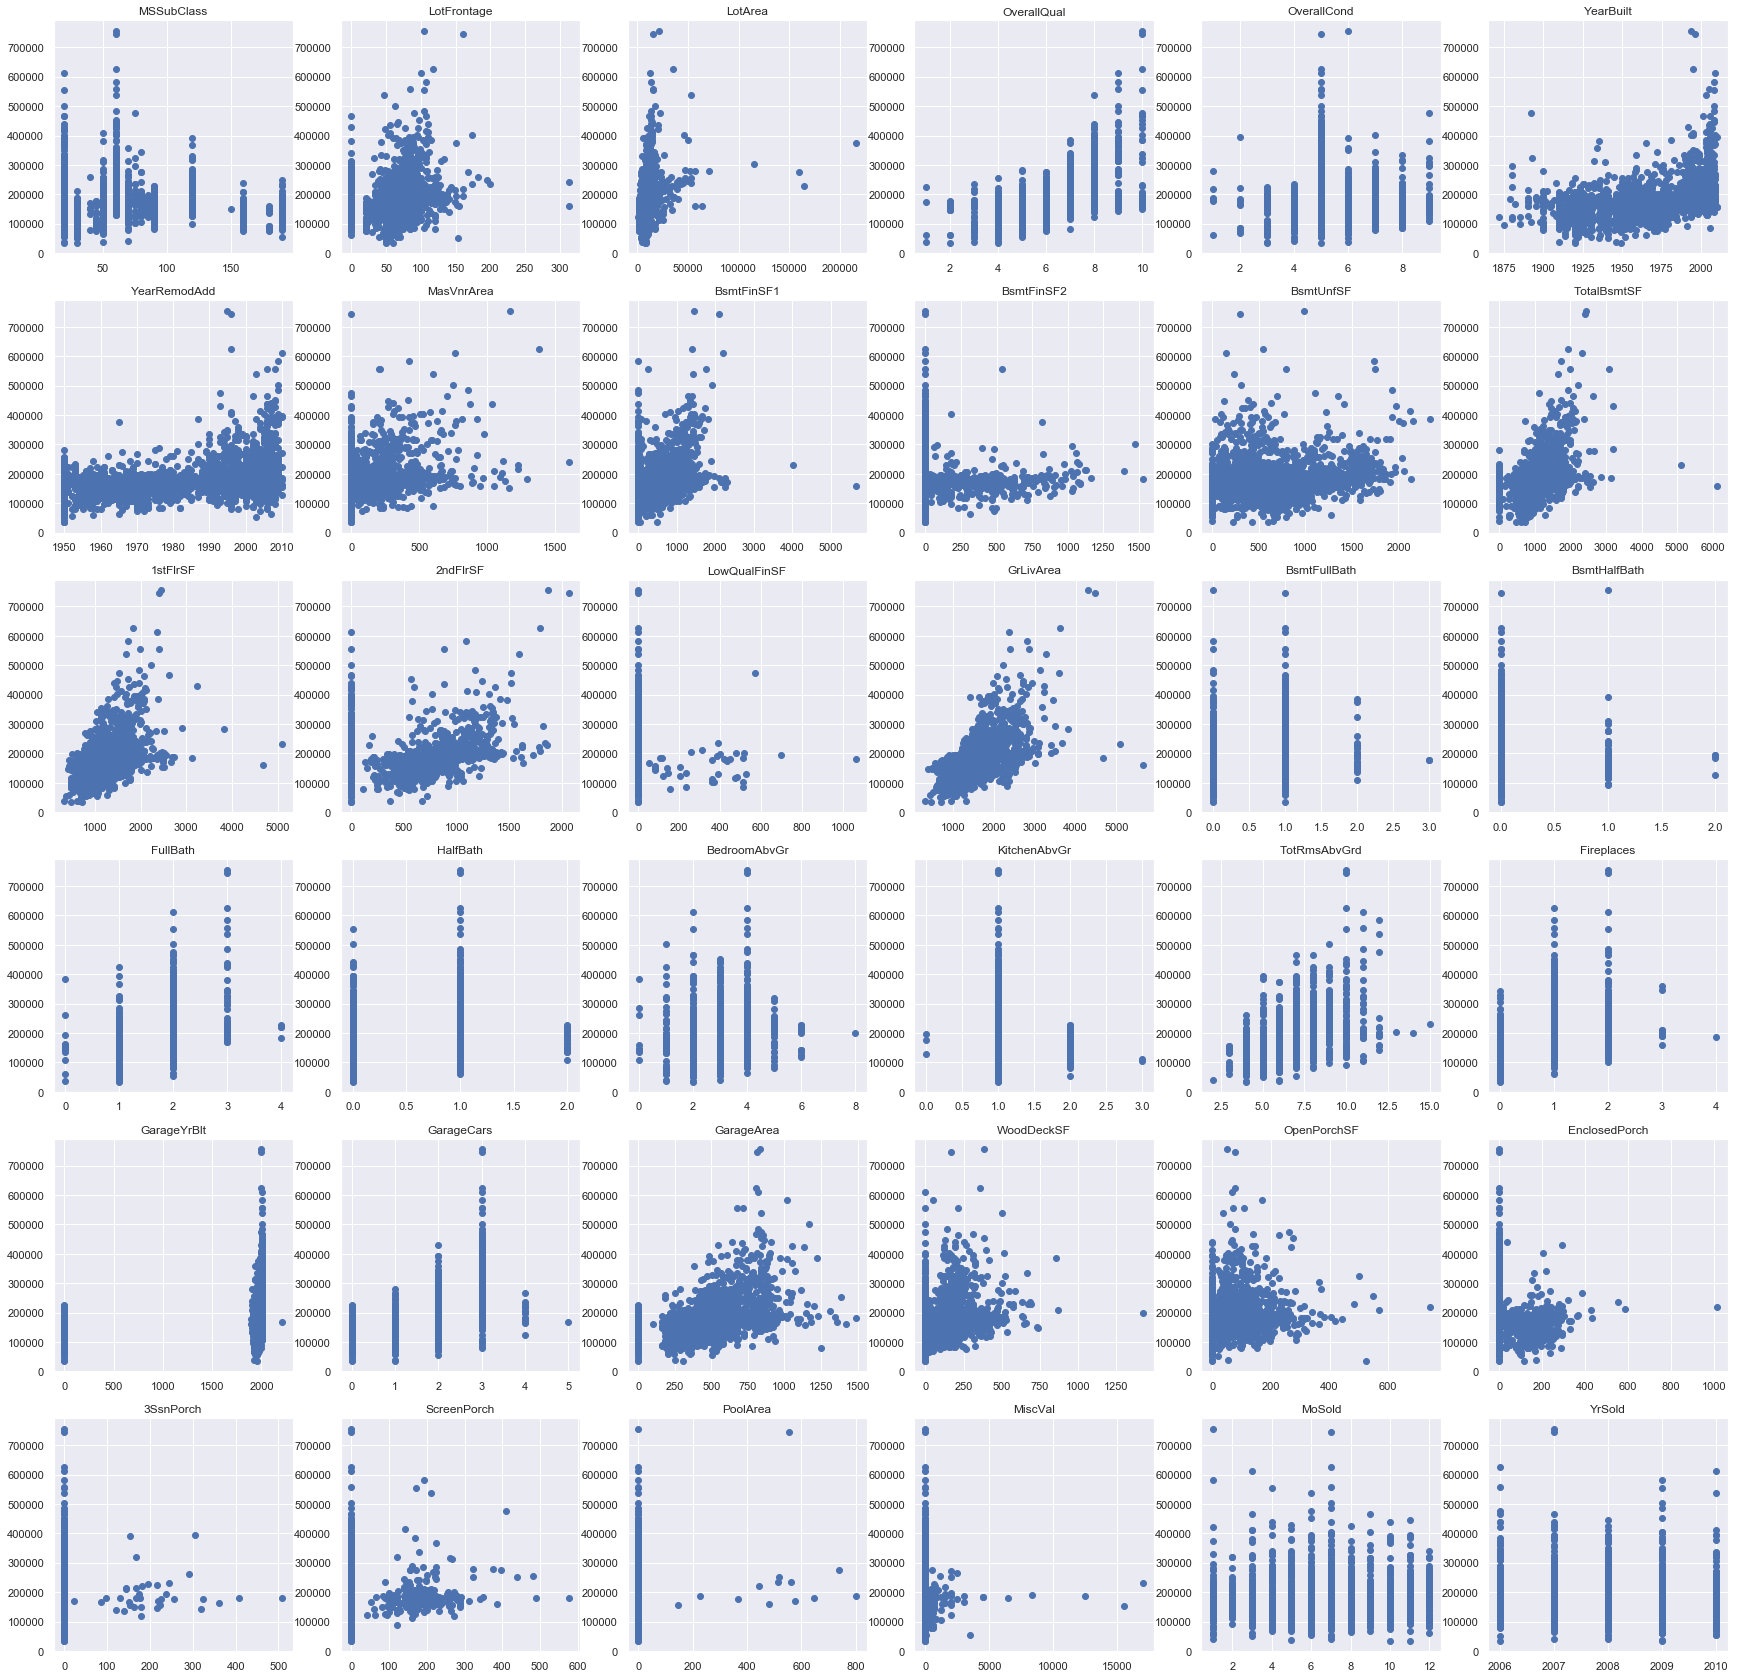

In [9]:
_, axs = plt.subplots(ncols=6, nrows=6, figsize=(30, 30))
axs = axs.ravel()
for ax, name_column in zip(axs, numeric_type_data):
    ax.scatter(x=alldata[name_column], y=alltarget)
    ax.set_title(name_column)

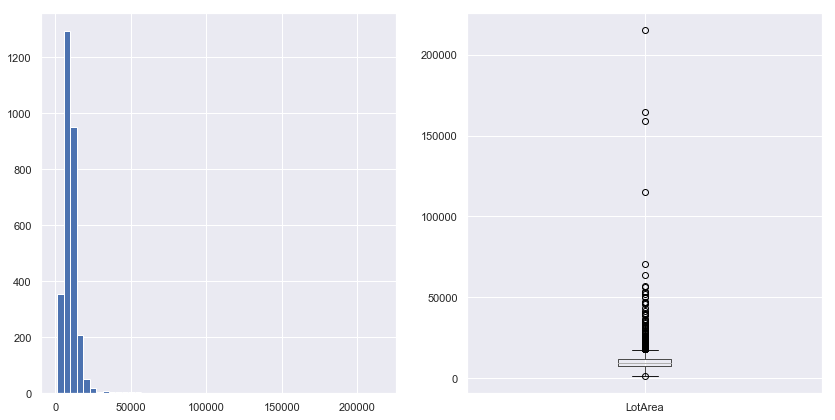

In [10]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
alldata['LotArea'].hist(ax=ax[0], bins=50)
alldata.boxplot(column='LotArea', figsize=(8, 8), ax=ax[1]);

In [11]:
alldata['LotArea'] = alldata['LotArea'].map(np.log)

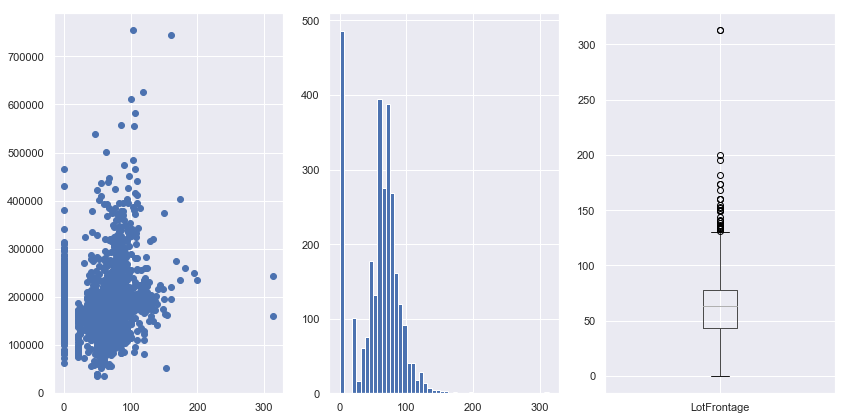

In [12]:
# LotFrontage
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,7))
ax[0].scatter(x=alldata['LotFrontage'], y=alltarget)
alldata['LotFrontage'].hist(ax=ax[1], bins=50)
alldata.boxplot(column='LotFrontage', figsize=(8, 8), ax=ax[2]);

In [13]:
alldata['LotFrontage'] = alldata['LotFrontage'].map(lambda x: np.log(x+10))

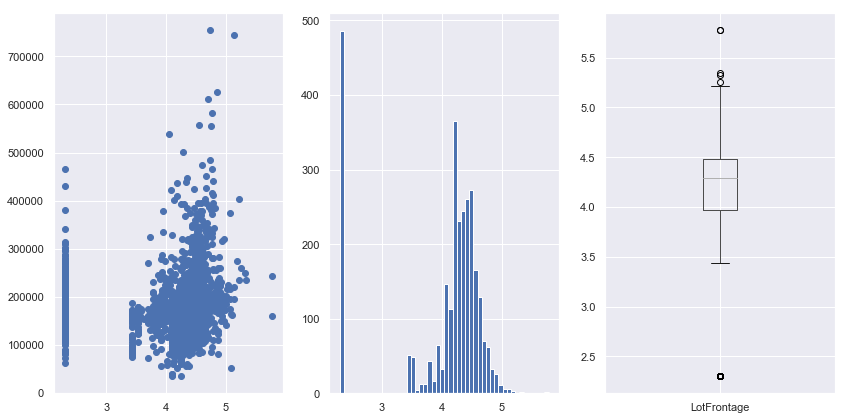

In [14]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,7))
ax[0].scatter(x=alldata['LotFrontage'], y=alltarget)
alldata['LotFrontage'].hist(ax=ax[1], bins=50)
alldata.boxplot(column='LotFrontage', figsize=(8, 8), ax=ax[2]);

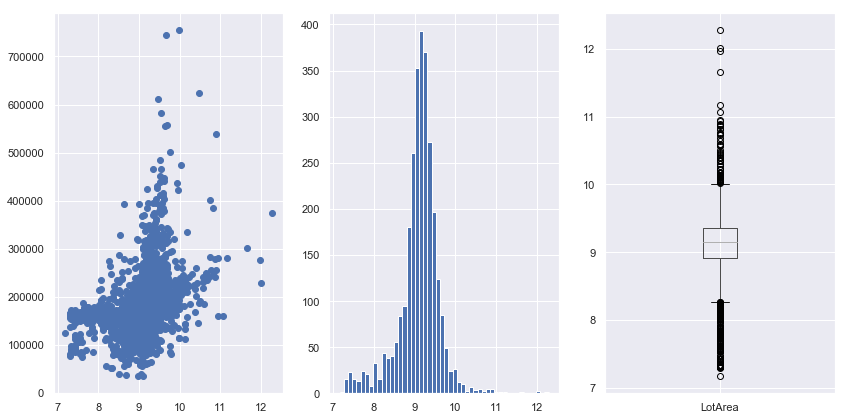

In [15]:
# LotArea
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,7))
ax[0].scatter(x=alldata['LotArea'], y=alltarget)
alldata['LotArea'].hist(ax=ax[1], bins=50)
alldata.boxplot(column='LotArea', figsize=(8, 8), ax=ax[2]);

In [16]:
# BsmtFinType1: Рейтинг готовой площади подвала
#     10 GLQ Good Living Quarters
#      5 ALQ Average Living Quarters
#      4 BLQ Below Average Living Quarters
#      3 Rec Average Rec Room
#      2 LwQ Low Quality
#      1 Unf Unfinshed
#      0 NA No Basement
# BsmtFinSF1: Готовые квадратные футы типа 1

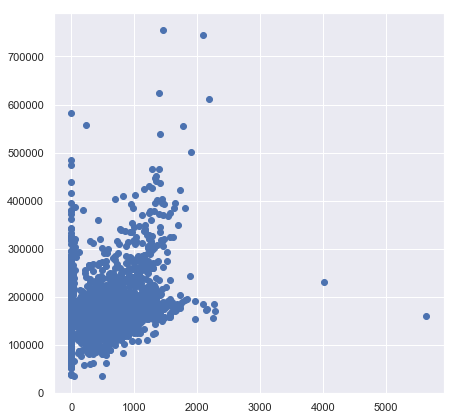

In [17]:
plt.scatter(x=alldata['BsmtFinSF1'], y=alltarget);

In [18]:
dict_BsmtFinSF1 = {'GLQ':6, 'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ': 2, 'Unf':1, 'NA': 0}
BFT1 = alldata['BsmtFinType1'].map(dict_BsmtFinSF1)

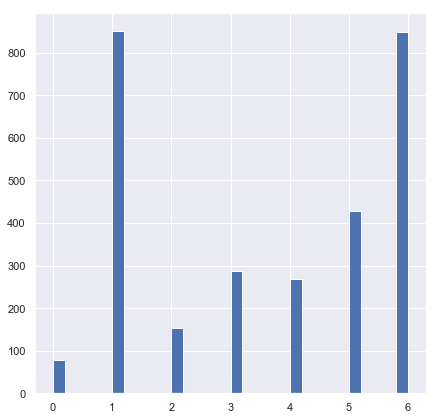

In [19]:
BFT1.hist(bins=30);

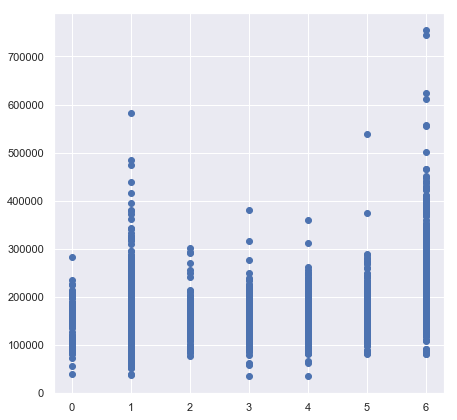

In [20]:
plt.scatter(x=BFT1, y=alltarget);

In [21]:
test = BFT1* alldata['BsmtFinSF1']

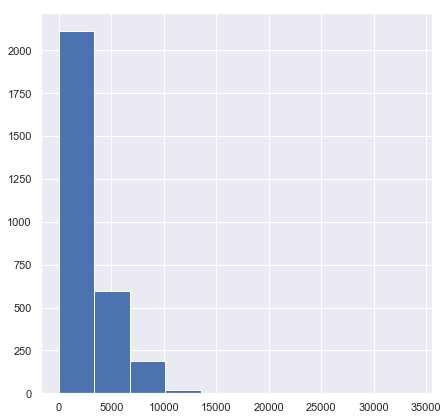

In [22]:
test.hist();

## Data Preprocessing

In [23]:
columns_names_type_object = [column for column in alldata.columns if alldata[column].dtype == 'object']
features_number = [column for column in alldata.columns if alldata[column].dtype != 'object']
object_data = alldata[columns_names_type_object]

In [24]:
def building_characteristics(features):
    x_category = []
    y_SalePrice = []
    category_xy_d = dict()
    for category in object_data[features].unique():
        x_category.append(category)
        d = alltarget.loc[object_data[object_data[features]==category].index]
        y_SalePrice.append(d.mean().values[0])
        category_xy_d[category] = d

    fig, ax = plt.subplots(figsize=(20, 8), ncols=2, nrows=1)
    ax[0].bar(x=np.arange(len(x_category)), height=y_SalePrice)
    ax[0].set_xticks(range(len(x_category)))
    ax[0].set_xticklabels(x_category);

    for i in category_xy_d.keys():
        category_xy_d[i].hist(ax=ax[1], bins=100)
    ax[1].legend(category_xy_d.keys());
    plt.title(features)

In [25]:
object_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
4,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
5,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [26]:
# m = alldata.dtypes != 'object'
# list_number_col = alldata[m[m == True].index]

# fig = plt.figure(figsize=(20,20))
# for index, col in enumerate(list_number_col.columns):
#     plt.subplot(8, 5, index+1)
#     sns.boxplot(y=col, data=list_number_col)

# fig.tight_layout(pad=1.5)

In [27]:
list_col_labelencoding = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'CentralAir', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'Condition2', 'Condition1','Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'SaleCondition', 'LandSlope']
# ранжированные labels
list_rangir = ['BsmtCond', 'BsmtExposure', 'ExterCond', 'ExterQual', 'HeatingQC', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

### LabelEncoder

In [28]:
for col in list_col_labelencoding:
    encder = LabelEncoder()
    encder.fit(alldata[col].unique())
    alldata[col] = encder.transform(alldata[col])

### One Hot Encoder

In [29]:
alldata

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,4.317488,9.041922,1,1,3,3,0,4,...,0,0,NA,NA,1,0,2,2008,9,4
2,20,4,4.499810,9.169518,1,1,3,3,0,2,...,0,0,NA,NA,1,0,5,2007,9,4
3,60,4,4.356709,9.328123,1,1,0,3,0,4,...,0,0,NA,NA,1,0,9,2008,9,4
4,70,4,4.248495,9.164296,1,1,0,3,0,0,...,0,0,NA,NA,1,0,2,2006,9,0
5,60,4,4.543295,9.565214,1,1,0,3,0,2,...,0,0,NA,NA,1,0,12,2008,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,5,3.433987,7.568379,1,1,3,3,0,4,...,0,0,NA,NA,1,0,6,2006,9,4
2916,160,5,3.433987,7.546446,1,1,3,3,0,4,...,0,0,NA,NA,1,0,4,2006,9,0
2917,20,4,5.135798,9.903488,1,1,3,3,0,4,...,0,0,NA,NA,1,0,9,2006,9,0


In [30]:
Neighborhood_df = pd.get_dummies(alldata['Neighborhood'], prefix='Neighborhood')
alldata.drop(columns='Neighborhood', inplace=True)
alldata = pd.concat([alldata, Neighborhood_df], axis=1)

### ranked coding

In [31]:
for i in list_rangir:
    print(alldata[i].unique(), i)

['TA' 'Gd' 'NA' 'Fa' 'Po'] BsmtCond
['No' 'Gd' 'Mn' 'Av' 'NA'] BsmtExposure
['TA' 'Gd' 'Fa' 'Po' 'Ex'] ExterCond
['Gd' 'TA' 'Ex' 'Fa'] ExterQual
['Ex' 'Gd' 'TA' 'Fa' 'Po'] HeatingQC
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NA'] Electrical
['Gd' 'TA' 'Ex' 'Fa' 'NA'] KitchenQual
['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] FireplaceQu
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po'] GarageQual
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex'] GarageCond
['NA' 'Ex' 'Fa' 'Gd'] PoolQC
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] Fence


In [32]:
label = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
s = []
for i in list_rangir:
    if set(alldata[i].unique()).issubset(set(label.keys())):
        alldata[i] = alldata[i].map(label)
    else:
        s.append(i)

In [33]:
for i in s:
    print(alldata[i].unique(), i)

['No' 'Gd' 'Mn' 'Av' 'NA'] BsmtExposure
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NA'] Electrical
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] Fence


In [34]:
# BsmtExposure
label_BsmtExposure = {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 1, 'NA': 0}
alldata.BsmtExposure = alldata.BsmtExposure.map(label_BsmtExposure)

In [35]:
# Electrical
label_Electrical = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'NA': 0}
alldata.Electrical = alldata.Electrical.map(label_Electrical)

In [36]:
# Fence
label_Fence = {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4 }
alldata.Fence = alldata.Fence.map(label_Fence)

In [37]:
alldata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 103 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MSSubClass            int64  
 1   MSZoning              int32  
 2   LotFrontage           float64
 3   LotArea               float64
 4   Street                int32  
 5   Alley                 int32  
 6   LotShape              int32  
 7   LandContour           int32  
 8   Utilities             int32  
 9   LotConfig             int32  
 10  LandSlope             int32  
 11  Condition1            int32  
 12  Condition2            int32  
 13  BldgType              int32  
 14  HouseStyle            int32  
 15  OverallQual           int64  
 16  OverallCond           int64  
 17  YearBuilt             int64  
 18  YearRemodAdd          int64  
 19  RoofStyle             int32  
 20  RoofMatl              int32  
 21  Exterior1st           int32  
 22  Exterior2nd           int32  
 23  MasVnrType  

In [38]:

alldata = pd.DataFrame(data=StandardScaler().fit_transform(alldata), columns=alldata.columns)

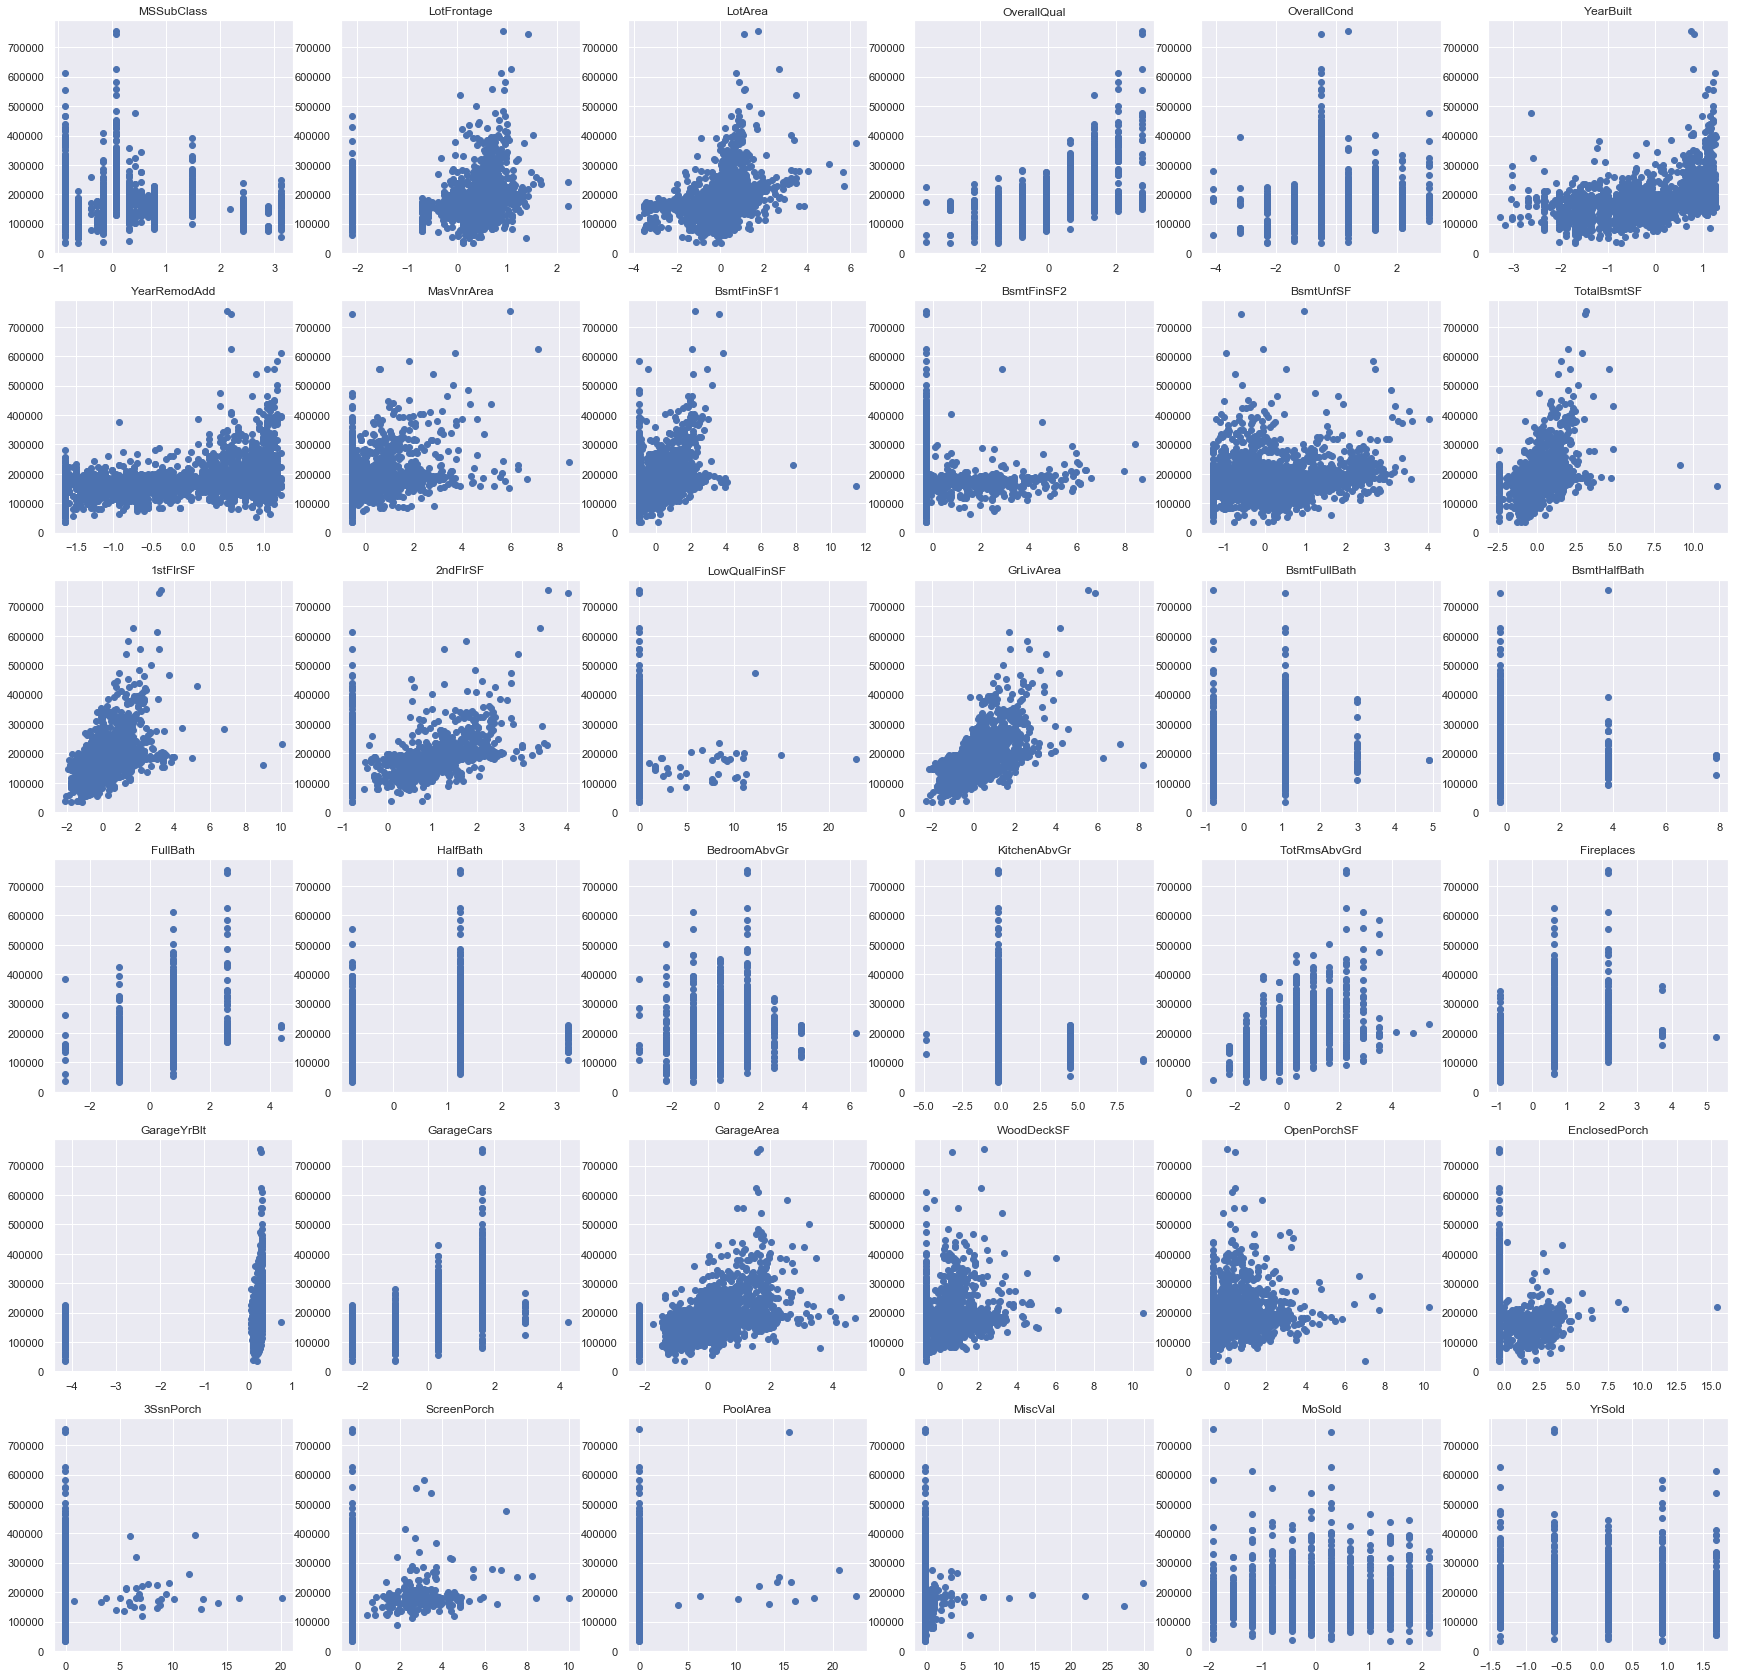

In [39]:
_, axs = plt.subplots(ncols=6, nrows=6, figsize=(30, 30))
axs = axs.ravel()
for ax, name_column in zip(axs, numeric_type_data):
    ax.scatter(x=alldata[name_column], y=alltarget)
    ax.set_title(name_column)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(28,7))
ax[0].plot(pca.explained_variance_)
ax[0].set_xlim(-1, 100);
ax[0].set_xlabel('number of components')
ax[0].set_ylabel('explained_variance_');


ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance');

## Data exploration

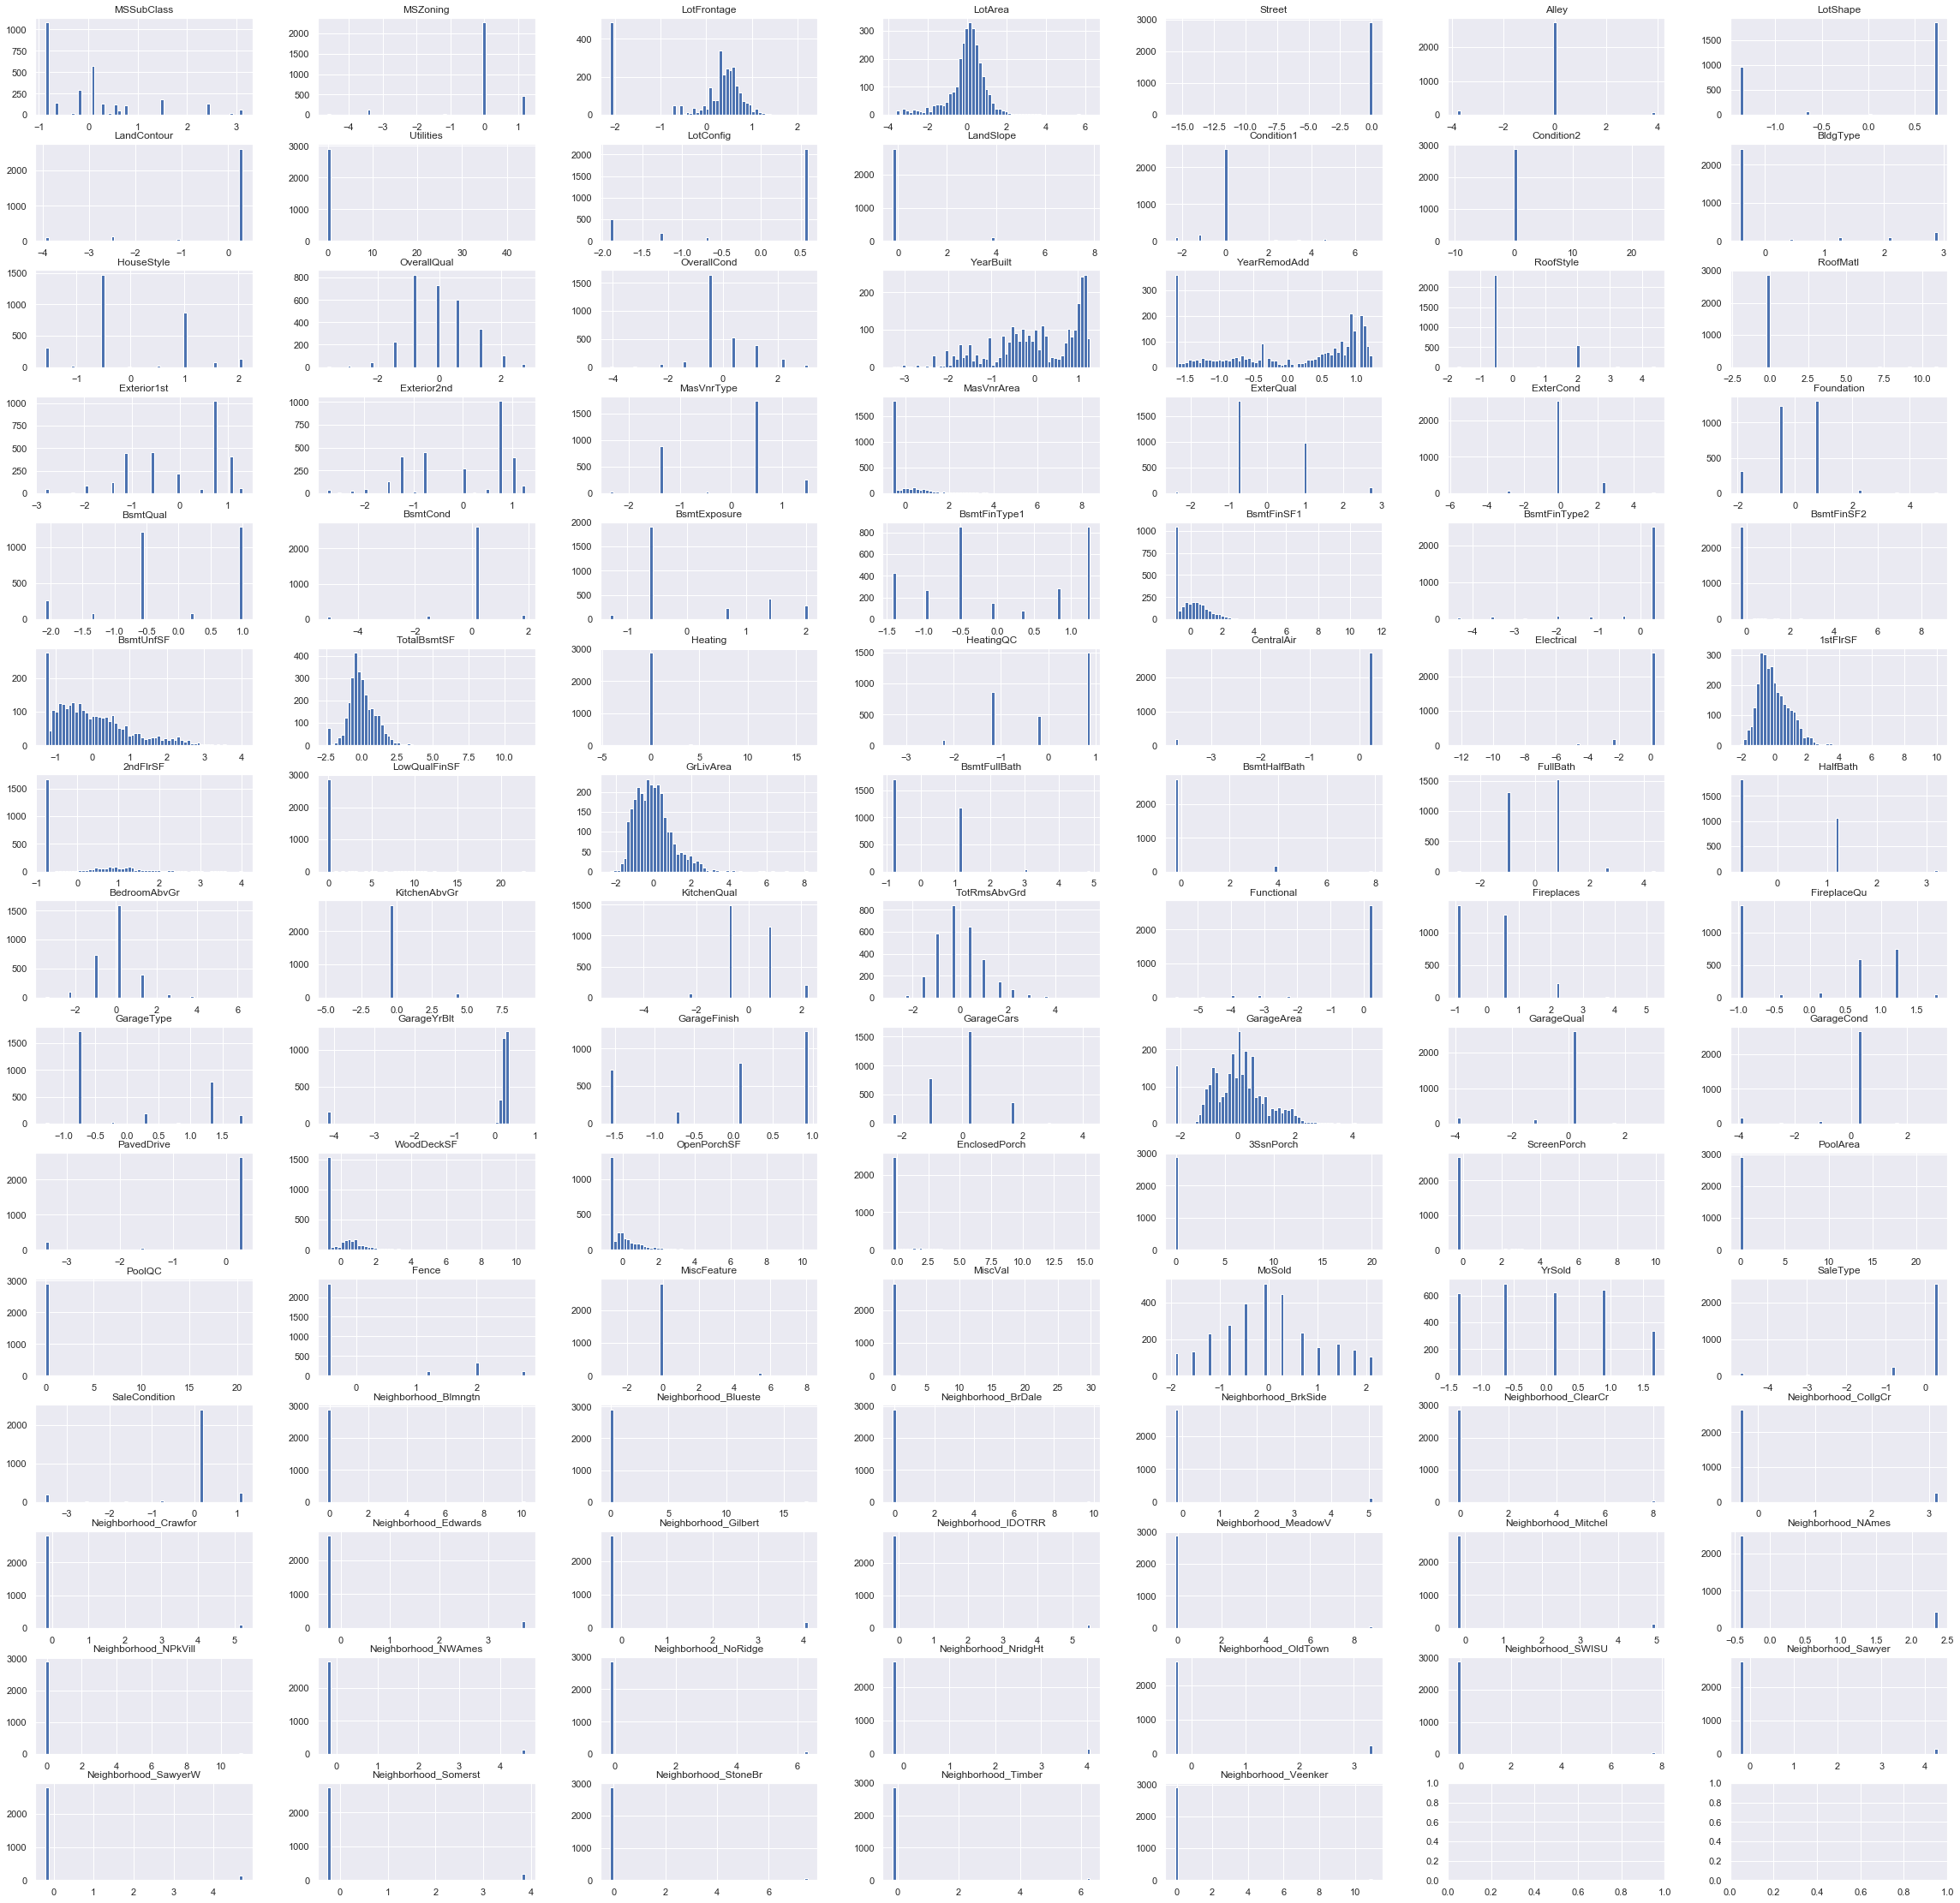

In [43]:
# numeric_feature_names = [i for i in train_data.columns if train_data[i].dtype != 'object']

_, axs = plt.subplots(figsize=(40, 40), ncols=7, nrows=15)
for ax, feature_name in zip(axs.ravel(), alldata.columns):
    alldata.hist(column=feature_name, bins=60, ax=ax);

## Data Correlation

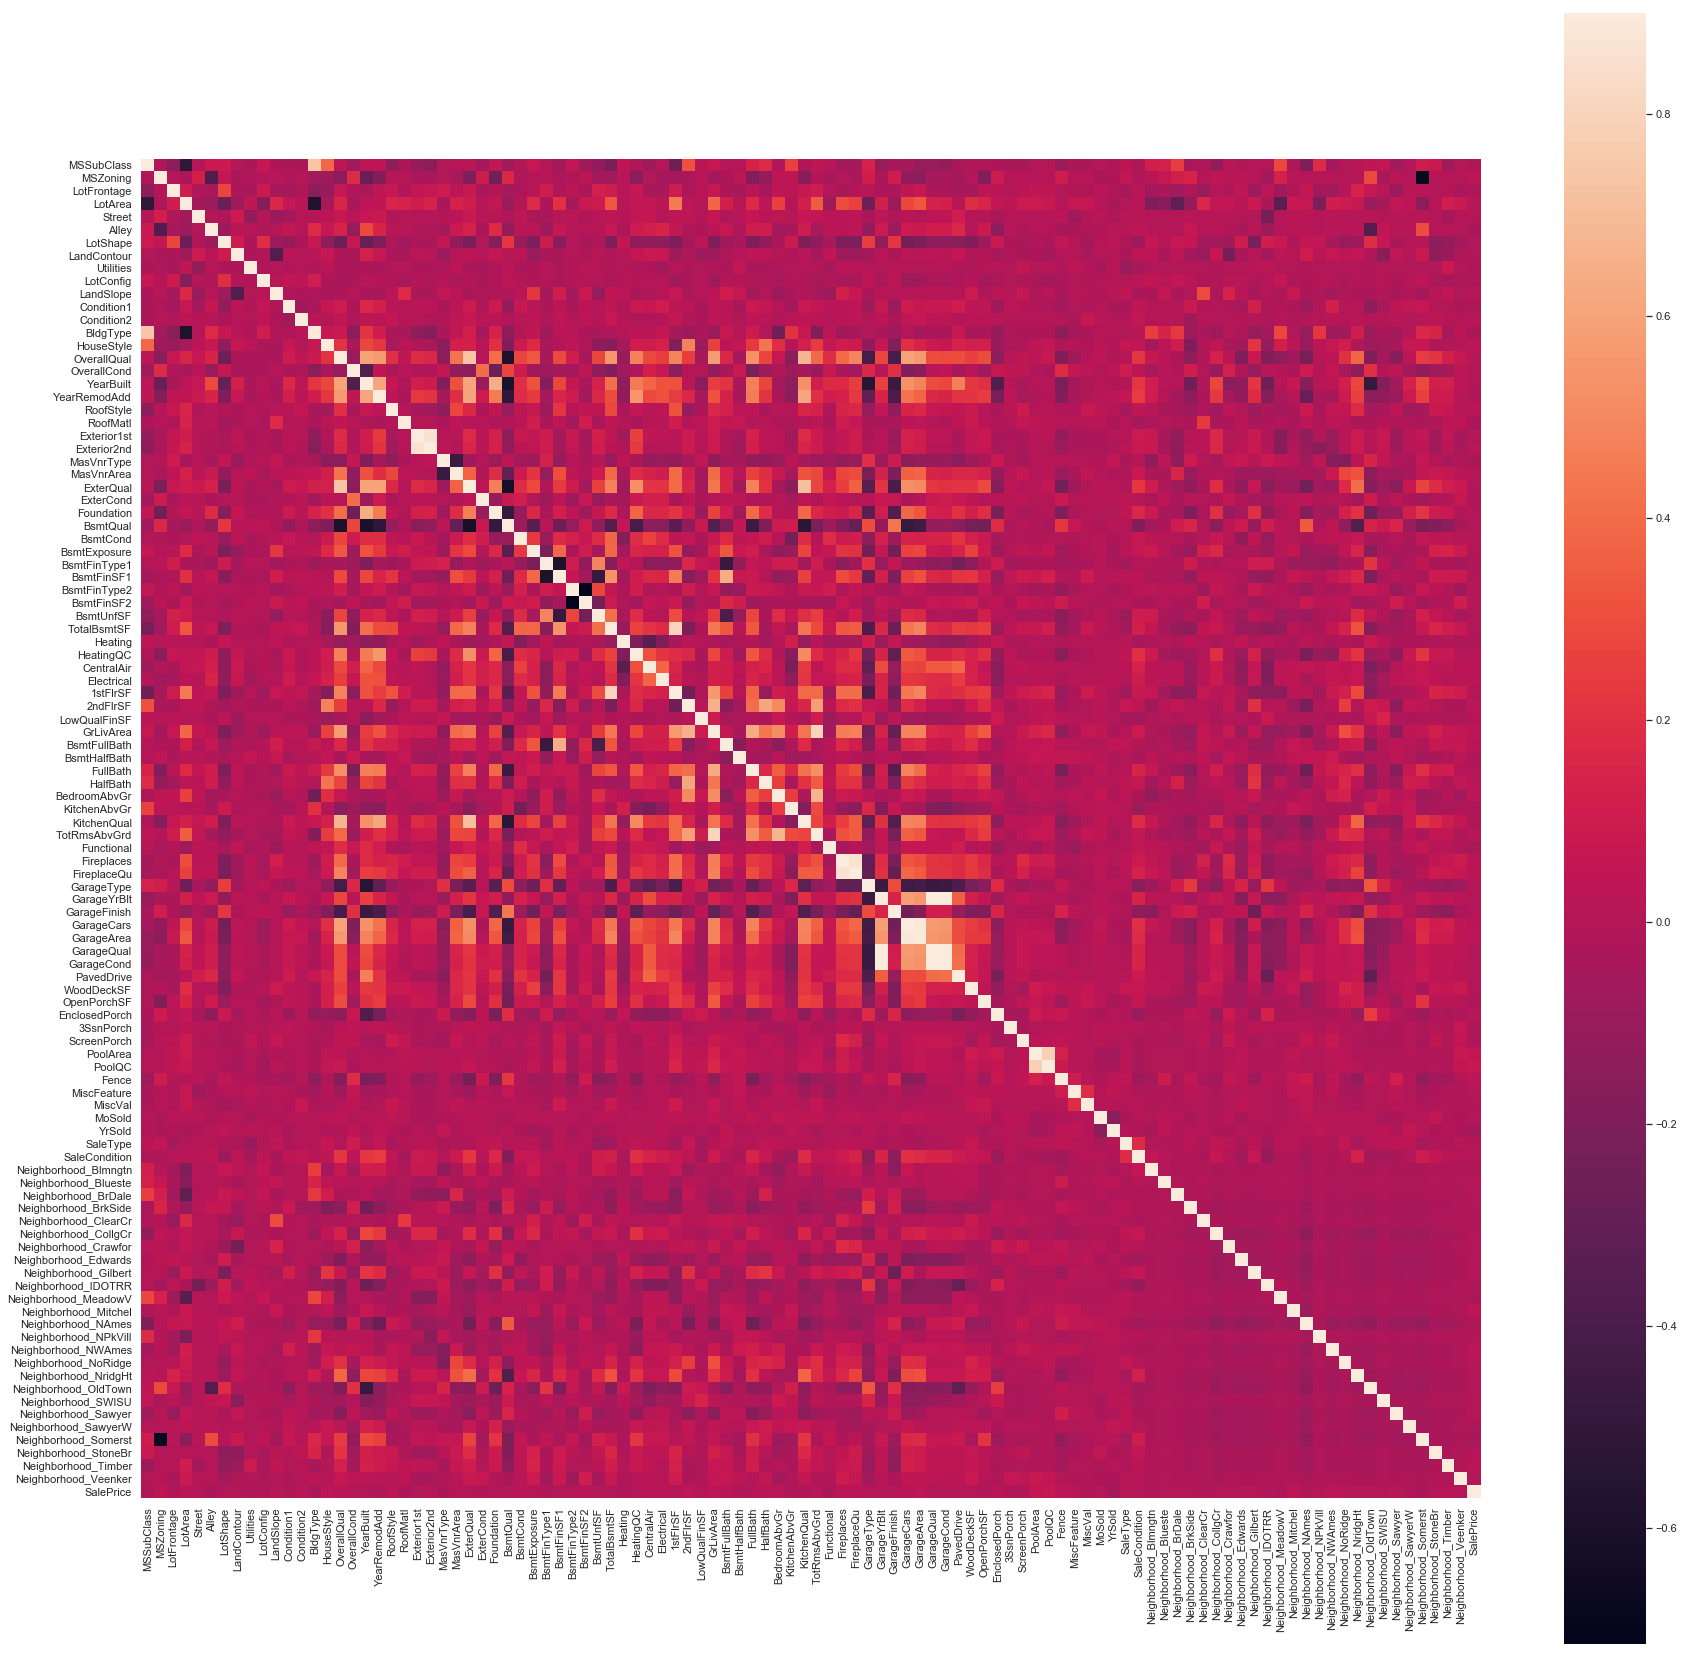

In [44]:
corrmat = pd.concat([alldata, alltarget], axis=1).corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [45]:
# Смотрю на соотношение фич и таргета (не очень хорошие покахатели)
a = corrmat['SalePrice'].sort_values(ascending=False)

In [46]:
a

SalePrice               1.000000
PoolQC                  0.076080
PoolArea                0.055012
MSZoning                0.040429
BedroomAbvGr            0.035254
                          ...   
Alley                  -0.036976
Functional             -0.038953
MasVnrType             -0.039302
Neighborhood_Somerst   -0.040865
YrSold                 -0.059054
Name: SalePrice, Length: 104, dtype: float64

In [49]:
# m = a > 0.3
# index = m[m==True].index

In [50]:
index

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
       'ExterQual', 'KitchenQual', 'GarageArea', '1stFlrSF', 'TotalBsmtSF',
       'FullBath', 'FireplaceQu', 'YearBuilt', 'Fireplaces', 'MasVnrArea',
       'YearRemodAdd'],
      dtype='object')

In [51]:
alldata

,GrLivArea,OverallQual,TotRmsAbvGrd,GarageCars,ExterQual,KitchenQual,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,...,Neighborhood_Veenker,Neighborhood_Gilbert,LandSlope,Street,Neighborhood_NWAmes,3SsnPorch,Neighborhood_SawyerW,ExterCond,LandContour,Condition2
Id,,,,,,,,,,,,,,,,,,,,,
1,1710,7,8,2.0,4,4,548.0,856,856.0,2,...,0,0,0,1,0,0,0,3,3,2
2,1262,6,6,2.0,3,3,460.0,1262,1262.0,2,...,1,0,0,1,0,0,0,3,3,2
3,1786,7,6,2.0,4,4,608.0,920,920.0,2,...,0,0,0,1,0,0,0,3,3,2
4,1717,7,7,3.0,3,4,642.0,961,756.0,1,...,0,0,0,1,0,0,0,3,3,2
5,2198,8,9,3.0,4,4,836.0,1145,1145.0,2,...,0,0,0,1,0,0,0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1092,4,5,0.0,3,3,0.0,546,546.0,1,...,0,0,0,1,0,0,0,3,3,2
2916,1092,4,6,1.0,3,3,286.0,546,546.0,1,...,0,0,0,1,0,0,0,3,3,2
2917,1224,5,7,2.0,3,3,576.0,1224,1224.0,1,...,0,0,0,1,0,0,0,3,3,2


In [52]:
alldata = alldata[[i for i in index[1:]]]

## Train and Test

In [54]:
index_test

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

## Scaler

In [44]:
# scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

# X_train = scalerX.fit_transform(train_data)
# X_test = scalerX.transform(test_data)
# y_train = scalerY.fit_transform(train_target)
# y_test = scalerY.transform(test_target)
y_train = train_target
y_test = test_target

In [45]:
X_train = alldata[:1460]
X_test = alldata[1460:]

## Modelling

In [46]:
lr = LinearRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: -21.77


In [47]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: -20.09


In [48]:
from sklearn.metrics import mean_squared_error

predict_ridge10 = ridge10.predict(X_test)
mean_squared_error(y_true=y_test, y_pred=predict_ridge10)

5751044122.16818

In [49]:
dataresult = pd.DataFrame(data=predict_ridge10, columns=['SalePrice'])
dataresult.index = test_target.index

In [50]:
dataresult.to_csv('submission.csv')